# Breast Cancer Biopsy Classification


### Introduction to Breast Cancer Biopsy Classification

Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge. 

Every patient that arrives at the hospital undergoes a biopsy of their tumor. This means that a small sample of the tumor is taken from the patient and various metrics are recorded about it, including: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. 

Using a large dataset of labeled biospy samples from breast cancer tumors, we will build a binary classification model to determine whether a tumor is malignant or benign based on these features. Then, this model can help us to better determine diagnoses for new patients who arrive at the hospital.




#### 1. Background and data exploration

- Task 1 (exploring the data)

#### 2. Simple boundary classifier

- Task 2 (separating on a boundary)
- Task 3 (precision, recall, accuracy)

#### 3. Modifying with logistic regression

- Task 4 (single feature logistic regression)
- Task 5 (multiple feature logistic regression)

#### 4. Decision trees 



# Background and data exploration

## Diagnosing cancer with biopsies


Before we dive into building a classifier for breast cancer tumors, it's important to understand how the data are generated and gain intuition for what the various features mean.

![alt text](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg)

The above image is an example of cancerous (malignant) breast cells next to benign cells. These cells were removed as part of a biopsy of a tumor from a patient in which a small amount of fluid/tissue from the tumor is sampled with a special needle. Then, the cells in this sample are strained with different dyes to visualize their shapes, how much DNA they have, etc. All these properties can help to give hints as to whether cells are rapidly dividing cancer cells or not. 

Our dataset reports 10 different features of the biopsies. Here's what each means:

1. $Radius$: Average distance from the center of the cell's nucleus to its perimeter.
2. $Perimeter$: Total distance between points defining the cell's nuclear perimeter.
3. $Area$: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.

The following image should give a visual to what these cell nucleus features look like: 

![perimeter](https://drive.google.com/uc?export=view&id=1-U43OAojYbMY9gIlpvLHPNr3V2saqqHJ)

4. $Compactness$: Calculated as the compactness of the cell nuclei using the
formula $perimeter^2/area$
5. $Smoothness$: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

![alt text](https://drive.google.com/uc?export=view&id=10GokzG7KDKxClJwHPIuIcr3ivvWGRetY)


The paper that first detailed these measurements for this dataset can be found here for more information: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf 


## Breast cancer diagnostic dataset

The dataset we will use to train our model is called the Breast Cancer Wisconsin (Diagnostic) Data Set. It consists of 569 biopsy samples, just like the ones described above, from breast cancer tumors. 

Each biopsy sample in the dataset is labeled with an ID number and whether or not the tumor it came from is malignant (M) or benign (B). Each sample also has 10 different features associated with it, some of which are described above. Remember that each feature value for a given biopsy sample is a real-valued number.



In [3]:
import pandas as pd
from sklearn import metrics
#gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);
data = pd.read_csv('/Users/shounakg/Desktop/cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

## Loading our annotated dataset

The first step in building our breast cancer tumor classification model is to load in the dataset we'll use to "teach" (or "train") our model.

In [4]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)

In [5]:
data_path  = 'cancer_data.csv'

In [6]:
# Use the 'pd.read_csv('file')' function to read in read our data and store it in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

 ## Looking at our dataset
 
 #### Task 1
 
 A key step in machine learning is to view the structure and dimensions of our new dataframe, which stores all our training data from the tumor biopsies. We want to confirm that the size of our table is correct, check out the features present, and get a more visual sense of what it looks like overall.

In [7]:
# Let's look at just a few of the biopsy sample features to start by subsetting our 'dataframe'
dataframe = dataframe[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]

You can think of dataframes like Google or Microsoft Excel spreadsheets (large tables with row/column headers) 

**Use the 'head()' method to show the first five rows of the table and their corresponding column headers (our 7 biopsy features!)**

In [8]:
dataframe.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490


The documentation below outlines what each feature column means. Specifically:

* $diagnosis$: Whether or not the tumor was diagnosed as malignant (M) or benign (B).
* $radius$_$mean$: The radius data feature, averaged across cells in that particular biopsy
* $area$_$mean$: The area data feature, averaged across cells in that particular biopsy
* $radius$_$se$: The standard error of the radius data feature for cells in that particular biopsy
* $area$_$se$: The standard error of the area data feature for cells in that particular biopsy
* $smoothness$_$mean$: The smoothness feature, averaged across cells in that particular biopsy
* $smoothness$_$se$: The standard error of the smoothness data feature for cells in that particular biopsy

Recall that the term mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy). Additionally, standarded error gives a sense of the standard deviation (how much variance there is between cells in that biopsy for that feature). 

In [9]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
diagnosis          569 non-null int64
radius_mean        569 non-null float64
area_mean          569 non-null float64
radius_se          569 non-null float64
area_se            569 non-null float64
smoothness_mean    569 non-null float64
smoothness_se      569 non-null float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


# Simple boundary classifier

We have gotten a sense of the dataset we will use to train our classification model. Our approach will be to first start simple -- let's look at just one feature of the data samples and see how well its value predicts M vs. B for our labeled dataset. 

## Can mean radius predict diagnosis?

In [10]:
# First, we'll import some handy data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt 

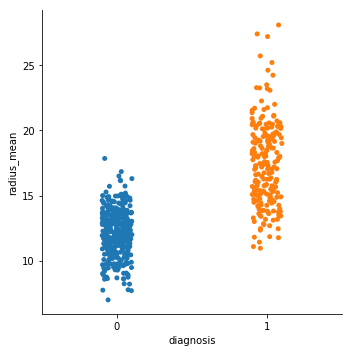

In [11]:
# To see how well mean radius correlates with diagnosis, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'diagnosis', y = 'radius_mean', data = dataframe)

## Classification is just drawing boundaries!
Next, we might want to check just how well mean radius can be used to classify, or separate, the datapoints in either category
Let's pick a boundary value for the radius mean and see how well it separates the data

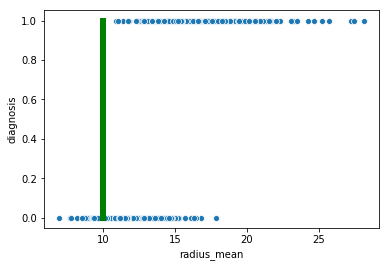

In [12]:
boundary = 10
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

Using a boundary value, we can build a boundary classifier function. This function will take in a boundary value of our choosing and then classify the data points based on whether or not they are above or below the boundary.

#### Building the boundary classifier

Here we build the function that takes in a target boundary (value of radius mean). Write a function to implement a boundary classifier. Think about what the return 'type' of this classifier might be. The parameter target_boundary refers to the boundary value, and x is a pandas Series data type object (a labeled 1D array).





The code below chooses a boundary and runs it for us. 

In [13]:
def boundary_classifier(target_boundary, x):
    result = []
    for i in x:
        if i > target_boundary:
            result.append(1)
        else:
            result.append(0)
    return result

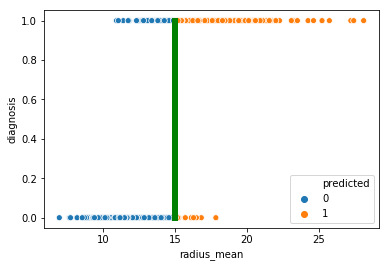

In [14]:
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
y_true = dataframe['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)


In [15]:
accuracy = metrics.accuracy_score(y_true,y_pred)
accuracy

0.8892794376098418

## What makes a separation good?



From exploring different boundary values for the radius mean feature, we can see that depending on which value is chosen, the data points are classified slighly differently. This brings up the question of how we can evaluate how good a classification is. 

Often, we do this by looking at the rates of true positives/true negatives/false positives/false negatives. Let's define these important terms:

**True positive rate (TPR)**: Sometimes called sensitvity, the TPR is the proportion of actual positives that are correctly identified as such. An analogy would be the percentage of sick people who are correctly identified as having the disease in some population.

**True negative rate (TNR)**: Sometimes called specificity, the TNR is the proportion of actual negatives that are correctly identified as such. An analogy would be the the percentage of healthy people who are correctly identified as not having the disease in some population.

**False positive rate (FPR)**: The FPR is the proportion of actual negatives that are incorrectly identified as positives. An analogy would be the percentage of healthy people who are incorrectly identified as having the disease.

**False negative rate (FNR)**: The FPR is the proportion of actual positives that are incorrectly identified as negatives. An analogy would be the percentage of sick people who are incorrectly identified as healthy.

A key insight is that there is a tradeoff when trying to reduce the different types of errors. For instance, if we want to increase our TPR (thus decrease our FNR by correctly identifying more sick people), our improvements will have to increase the number of people we guess to be sick. However, such an improvement will decrease our TNR (thus inrease our FPR by guessing more healty people are sick). 

Sometimes, one type of error is worse than the others for a given problem. Other times, however, we must strike an acceptable balance between the two.

![alt text](https://drive.google.com/uc?export=view&id=1S4S2MBM86D74C-Q0aPPwHzbU8iUveLKq)

### Task 3

Next, let's evaluate the performance of our model quantitatively. We can visualize statistics on the number of correct vs. incorrect predictions using a plot called a Confusion Matrix.


Text(0.5, 257.44, 'Predicted diagnosis')

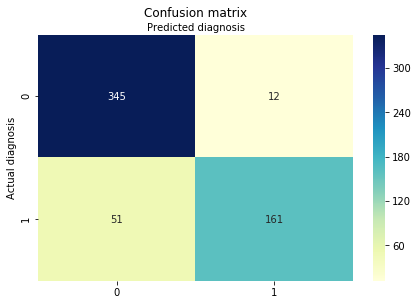

In [16]:
#@title Run this code to create a confusion matrix. { display-mode: "form" }
#@markdown If you are curious how it works you may double-click to inspect the code.

# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [17]:

def model_stats(y_test,y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    print ("Accuracy: " + str(accuracy))
    print ("Precision: " + str(precision))
    print ("Recall: " + str(recall))

In [18]:
model_stats(y_test, y_pred)

Accuracy: 0.8892794376098418
Precision: 0.930635838150289
Recall: 0.7594339622641509


# Finding a better separation with logistic regression



### Task 4

Now, it's time to move away from our simple guess-and-check model and work towards implementing a an approach that can automatically find a better separation. One of the most common methods for this is called 'Logistic Regression'. 

First, we'll start by just using the radius_mean feature. 

In [19]:
# Let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn import linear_model

### Training Data vs Test Data

We're splitting up our data set into groups called 'train' and 'test'. We teach our 'model' the patterns using the train data, but the whole point of machine learning is that our prediction should work on 'unseen' data or 'test' data. The function below does this for you. 


In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)


Let's now take a look at the 'train' and 'test' groups:


In [21]:
print('\n\nTraining dataframe has %d rows'%train_df.shape[0])
train_df.head()



Training dataframe has 341 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,0.004910,1
13,1,15.850,782.7,0.4033,36.58,0.08401,0.009769,1
430,1,14.900,685.0,0.2530,24.19,0.09947,0.006965,0
61,0,8.598,221.8,0.3582,18.39,0.12430,0.011930,0
427,0,10.800,359.9,0.3077,20.20,0.08801,0.006543,0


In [22]:
print('\n\nTesting dataframe has %d rows'%test_df.shape[0])
test_df.head()



Testing dataframe has 228 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0.009976,0
47,1,13.17,534.6,0.2871,24.25,0.11580,0.006532,0
292,0,12.95,513.7,0.2094,17.67,0.10050,0.008725,0
186,1,18.31,1041.0,0.2577,28.92,0.08588,0.002866,1
414,1,15.13,719.5,0.4681,45.38,0.08320,0.006831,1


### Single Variable Logistic Regression
To start with let us set our input feature to be radius mean and our output variable to be the diagnosis. 

We will use this to build a logistic regression model to pedict the diagnosis using radius mean. We will explain what a logistic regression is shortly!

In [23]:
input_labels = ['radius_mean']
output_label = 'diagnosis'


x_train = train_df[input_labels]
print('Our x variables')
print(x_train.head())
print('\n\n')

y_train = train_df[output_label]
print('Our y variable:')
print(y_train.head())

Our x variables
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800



Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


In [24]:
# Here, we create a 'reg' object that handles the line fitting for us!
class_rm = linear_model.LogisticRegression()

###Next, we want to tell our 'class_rm' object to take in my inputs (x) and my true labels (y) and fit a line that predicts y from x.

#### Exercise: Can you place the arguments `x_train` and `y_train` correctly into this function to do this?
`class_rm.fit(FILL_ME_IN, FILL_ME_IN)`


In [25]:
class_rm.fit(x_train, y_train)

/Users/shounakg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### How do we know if our 'model' is actually 'learning' anything? We need to test it on unseen data.

Here we will be designating test inputs to check our model.

In [26]:
x_test = test_df[input_labels]

The lines of code below gives us the true or actual values for the test inputs, and our predicted outputs.


In [27]:
y_test = test_df[output_label].values.squeeze()
y_pred = class_rm.predict(x_test)
print(y_pred)

[0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


Run the code below to visualize the results.

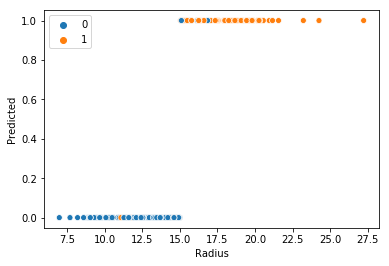

In [28]:
y_pred = y_pred.squeeze()
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

### Finally, let's re-evalute the recall, accuracy, and precision for the model by calling the functions we created.

In [29]:
model_stats(y_test,y_pred)

Accuracy: 0.8903508771929824
Precision: 0.9230769230769231
Recall: 0.75


## What is logistic regression doing? It's giving 'soft' predictions!


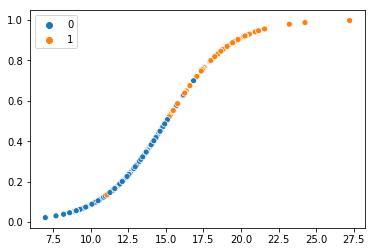

In [30]:
# Let's visualize the probabilities for `x_test`
y_prob = class_rm.predict_proba(x_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

The Y-axis is the  probability of being 'malignant' and the X-axis is the radius mean. 



## How does logistic regression relate to linear regression? 



Recall that linear regression establishes a relationship between the independent and dependent variables. This is particularly useful when we want to estimate the dependent variable based on the value of the independent variable(s). 

With logistic regression, we are predicting a probability between 0 and 1 (like whether or not a tumor is malignant or benign). 

When we look at graphical representations, linear regression will yield a line while logistic regression an S-shaped curve. 


## Visualization: linear vs. logistic regression



This plot shows the graphical representations described above. As you can see, the linear model can yield predicted values outside the [0,1] range because it is a continuous linear function. 

On the other hand, the logistic model stays within our bounds. You can see that the logistic model gives a "line" with curvy ends in the [0,1] range, which is the best approximation for a line that will also always respect these boundaries. 

**Confusingly, the biggest difference between linear and logistic regression is that linear regression is used for regression problems (predicting the value of continuous variables) while logistic regression is used for classification problems!**

*Linear Regression:*

![Linear Regression](https://i.stack.imgur.com/kW8YP.png)

*Logistic Regression:*

![Logistic Regression](https://techdifferences.com/wp-content/uploads/2018/01/graph-logistic-regression.jpg)

# (Optional) An even better logistic regression! 

#### Exercise 5

Previously, we still just used a single feature to predict diagnosis. Now, let's leverage our input data's many features to build an even better classifier. First, let's set our input labels to be the list of all our features we chose for our dataframe and our output label to be the diagnosis.

```
input_labels =
output_label =
```


#### How do you select multiple columns from a pandas Dataframe?

```

pd.DataFrame[['radius_mean','area_mean']] ## this returns a dataframe


pd.DataFrame['area_mean'] ## this returns a pandas Series

```

In [31]:
# YOUR CODE HERE:
input_labels = ['radius_mean', 'area_mean', 'radius_se', 'area_se', 'smoothness_mean', 'smoothness_se'] 
output_label = ['diagnosis']

train_df, test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)

x_train = train_df[input_labels]

y_train = train_df[output_label]
y_train = y_train.squeeze()




# END CODE

In [32]:
#@title Let's visualize our selection { display-mode: "form" }


print('Our x variables')
print(x_train.head())
print('\n')

print('Our y variable:')
print(y_train.head())

Our x variables
     radius_mean  area_mean  radius_se  area_se  smoothness_mean  \
164       23.270     1686.0     0.6642    97.85          0.08439   
13        15.850      782.7     0.4033    36.58          0.08401   
430       14.900      685.0     0.2530    24.19          0.09947   
61         8.598      221.8     0.3582    18.39          0.12430   
427       10.800      359.9     0.3077    20.20          0.08801   

     smoothness_se  
164       0.004910  
13        0.009769  
430       0.006965  
61        0.011930  
427       0.006543  


Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


In [33]:
class_rm = linear_model.LogisticRegression()
class_rm.fit(x_train, y_train)

x_test = test_df[input_labels]
y_test = test_df[output_label].values.squeeze()


y_pred = class_rm.predict(x_test)


model_stats(y_test,y_pred)


Accuracy: 0.8991228070175439
Precision: 0.88
Recall: 0.825


/Users/shounakg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Trees 

Finally, let's try a different classification model: decision trees! With decision trees, we choose features that create the best splits of our dataset (separates it into classes as best it can at that time).

In [35]:
#@title Create the model { display-mode: "both" }
import sklearn
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=2)

# We use our previous `x_train` and `y_train` sets to build the model
class_dt.fit(x_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
tree.plot_tree(class_dt) # Why does this not work?

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [ ]:
#@title Find the predictions based on the model { display-mode: "both" }
# now let's see how it performed!
y_pred = class_dt.predict(x_test)

In [ ]:
#@title Calculate model performance { display-mode: "both" }
model_stats(y_test, y_pred)